In this notebook, I will explore some of the key demographic indicators for Bangladesh from 1950 to 2020. These indicators include total population, male and female population, population density, population sex ratio, median age, natural change, births, deaths, life expectancy, infant mortality rate, and net migration rate. These indicators will help us understand the changes and trends in Bangladesh's population over time and how these changes have affected the country's development and well-being.

# Data Cleaning and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.set_option('display.max_columns', None)       

/kaggle/input/wpp2022-demographic-indicators/WPP2022_Demographic_Indicators.csv


In [2]:
df = pd.read_csv('/kaggle/input/wpp2022-demographic-indicators/WPP2022_Demographic_Indicators.csv', low_memory=False)

wdf = df.drop(columns=['SortOrder', 'Notes', 'LocID', 'ISO3_code', 'ISO2_code', 'SDMX_code', 'LocTypeID', 'LocTypeName', 'ParentID', 'VarID', 'Variant', 'TPopulation1Jan'])

newdf = wdf.rename(columns={'TPopulation1July':'TotalPopulation', 'TPopulationMale1July':'TPopulationMale', 'TPopulationFemale1July':'TPopulationFemale', 'CBR':'CrudeBirthRate', 'TFR':'TotalFertilityRate', 'NRR':'NetReproductionRate', 'MAC':'MeanAgeChildbearing', 'SRB':'SexRatioatBirth', 'CDR':'CrudeDeathRate', 'LEx':'LifeExpectancyatBirth', 'IMR':'Infant Mortality Rate', 'LBsurvivingAge1':'LiveBirthsSurvivingAge1', 'Q5':'Under5MortalityRate', 'Q0040':'MorBfr40', 'Q0040Male':'MorBfr40Male', 'Q0040Female':'MorBfr40Female', 'Q0060':'MorBfr60', 'Q0060Male':'MorBfr60Male', 'Q0060Female':'MorBfr60Female', 'Q1550':'MorBtn15&50', 'Q1550Male':'MorBtn15&50Male', 'Q1550Female':'MorBtn15&50Female', 'Q1560':'MorBtn15&60', 'Q1560Male':'MorBtn15&60Male', 'Q1560Female':'MorBtn15&60Female', 'CNMR':'NetMigrationsRate'})

new_df = newdf[newdf.Location == 'Bangladesh']

def is_divisible_by_5(x):
    return x % 5 == 0

fnldf = new_df.loc[(new_df['Time'].apply(is_divisible_by_5)) & (new_df['Time'] <= 2020)].sort_values(by='Time').reset_index().drop('index', axis=1)

# Brief Overview

In [3]:
fnldf

,Location,Time,TotalPopulation,TPopulationMale,TPopulationFemale,PopDensity,PopSexRatio,MedianAgePop,NatChange,NatChangeRT,PopChange,PopGrowthRate,DoublingTime,Births,Births1519,CrudeBirthRate,TotalFertilityRate,NetReproductionRate,MeanAgeChildbearing,SexRatioatBirth,Deaths,DeathsMale,DeathsFemale,CrudeDeathRate,LifeExpectancyatBirth,LExMale,LExFemale,LE15,LE15Male,LE15Female,LE65,LE65Male,LE65Female,LE80,LE80Male,LE80Female,InfantDeaths,Infant Mortality Rate,LiveBirthsSurvivingAge1,Under5Deaths,Under5MortalityRate,MorBfr40,MorBfr40Male,MorBfr40Female,MorBfr60,MorBfr60Male,MorBfr60Female,MorBtn15&50,MorBtn15&50Male,MorBtn15&50Female,MorBtn15&60,MorBtn15&60Male,MorBtn15&60Female,NetMigrations,NetMigrationsRate
0,Bangladesh,1950,39728.534,20741.251,18987.283,305.2050,109.2376,18.3298,776.347,19.536,784.675,1.975,35.0961,1848.454,449.461,46.515,6.2958,1.7346,27.393,104.8,1072.107,558.157,513.949,26.979,38.1802,38.2187,38.1118,46.2535,46.7407,45.7633,9.4834,9.3240,9.6679,3.5560,3.5949,3.5162,399.681,219.1649,1564.528,628.096,347.9099,475.9966,465.3804,488.1313,616.2740,617.7915,614.6395,225.9965,209.0240,243.8602,372.3128,370.9951,372.9228,8.312,0.209
1,Bangladesh,1955,44315.548,23056.332,21259.216,340.4436,108.4533,18.2449,1095.840,24.713,1065.157,2.404,28.8331,2139.731,524.256,48.255,6.4886,1.9380,27.325,104.7,1043.891,537.462,506.429,23.542,41.8933,42.1823,41.5593,47.3951,48.1359,46.6180,10.0340,9.9593,10.1136,3.7697,3.8300,3.6983,408.900,192.7505,1850.676,619.967,300.6773,428.1452,414.3518,443.4329,569.4889,565.9861,573.2064,212.8424,192.1253,234.6500,348.4905,340.5472,356.3549,-30.690,-0.692
2,Bangladesh,1960,50396.429,26157.018,24239.411,387.1586,107.9111,17.8353,1422.914,28.229,1436.494,2.851,24.3124,2492.613,601.446,49.451,6.7843,2.1456,27.327,104.7,1069.699,548.564,521.135,21.222,44.7405,45.1210,44.3143,48.3199,49.1222,47.4756,10.6302,10.5960,10.6657,3.9990,4.0555,3.9337,427.914,173.4213,2189.655,640.766,267.0549,392.1906,377.7079,408.1218,535.4878,530.3121,540.8642,203.9872,182.5557,226.7666,333.5951,323.8596,343.3107,13.584,0.269
3,Bangladesh,1965,58500.159,30318.485,28181.674,449.4135,107.5823,17.3217,1686.380,28.834,1733.998,2.964,23.3855,2816.218,629.610,48.152,6.8298,2.2290,27.489,104.8,1129.838,568.269,561.569,19.318,46.8579,47.8577,45.7904,49.2015,50.7530,47.5776,11.3135,11.5774,11.0374,4.3100,4.4821,4.1272,445.597,158.9967,2502.399,670.646,243.6092,367.6379,347.3823,389.4607,510.4623,492.5645,529.5868,197.2252,165.1260,231.1194,320.9522,294.7932,348.5004,47.618,0.814
4,Bangladesh,1970,67541.860,34998.362,32543.499,518.8742,107.5433,16.5864,1700.619,25.140,1507.467,2.232,31.0550,3209.314,754.413,47.443,6.8822,2.0504,27.595,104.9,1508.695,738.957,769.738,22.303,42.5867,44.4847,40.6651,46.9132,49.7541,44.0570,11.1688,11.7392,10.5742,4.4184,4.6913,4.1280,528.951,165.3247,2837.458,838.125,265.8789,428.7816,398.4708,460.7597,581.4520,542.2485,621.4674,242.5088,186.2774,300.3947,379.2884,321.3962,438.1707,-193.149,-2.855
5,Bangladesh,1975,74700.345,38432.400,36267.944,573.8676,105.9680,16.0668,2214.881,29.547,1715.539,2.297,30.1762,3461.322,832.711,46.175,6.7366,2.3276,27.916,105.0,1246.441,628.292,618.149,16.628,50.2919,51.2455,49.2842,51.3433,52.7270,49.9071,12.2336,12.6012,11.8242,4.8867,5.1384,4.5906,514.223,149.2660,3099.222,758.460,223.8364,323.5521,306.9631,341.0191,463.3141,447.6279,479.8723,166.6810,141.1454,193.2623,285.6974,263.8518,308.4352,-499.347,-6.661
6,Bangladesh,1980,83929.765,43009.114,40920.651,644.7704,105.1037,16.3957,2479.480,29.473,2110.067,2.514,27.5715,3792.691,873.094,45.083,6.3227,2.2503,27.907,105.2,1313.211,661.289,651.923,15.610,51.8498,52.8483,50.8097,51.7139,53.0512,50.3397,12.3601,12.7743,11.8901,5.0918,5.3734,4.7436,523.450,138.6403,3424.170,764.903,205.7382,300.9120,285.1188,317.1715,444.4159,428.6482,460.7823,160.2327,136.5530,184.5422,279.3941,258.7015,300.6370,-369.408,-4.391
7,Bangladesh,1985,95959.099,49158.092,46801.008,737.1829,105.0364,16.4766,2596.510,27.029,2391.558,2.492,2

# Data Visualizations

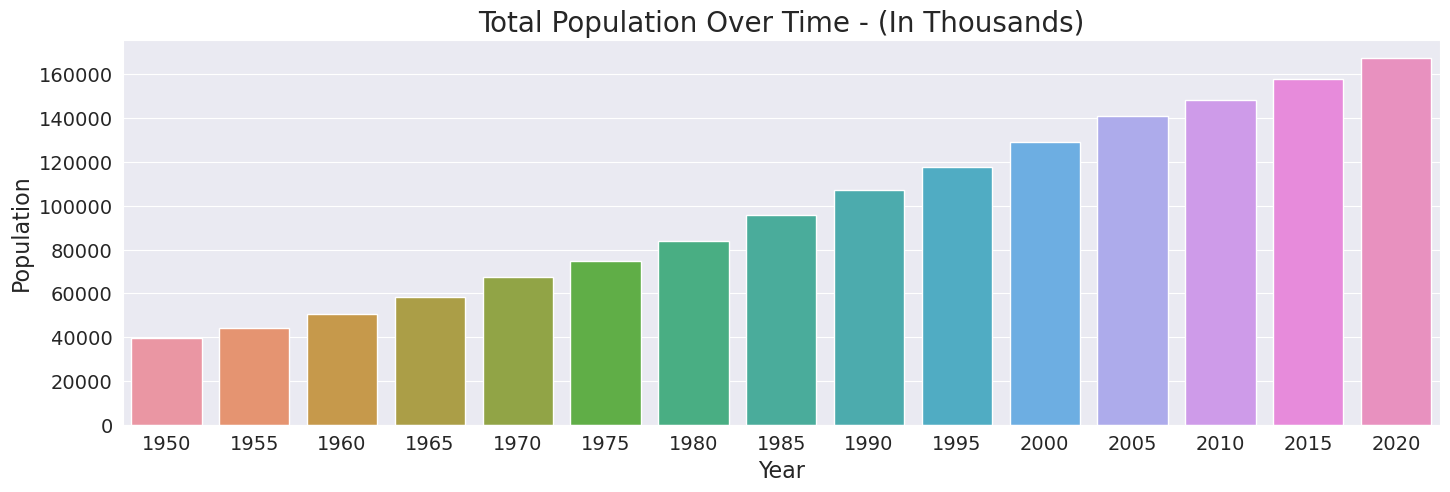

In [4]:
sns.barplot(x='Time', y='TotalPopulation', data=fnldf)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.title('Total Population Over Time - (In Thousands)', fontsize=20)

plt.show();

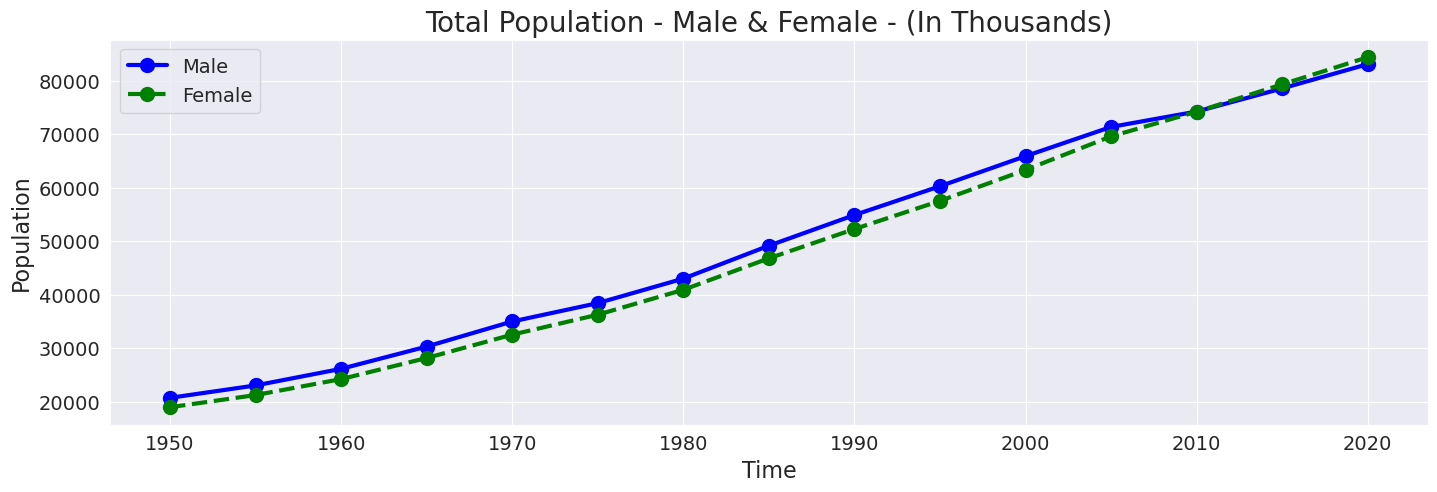

In [5]:
plt.plot(fnldf['Time'], fnldf['TPopulationMale'], 'o-b', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['TPopulationFemale'], 'o--g', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.title('Total Population - Male & Female - (In Thousands)', fontsize=20)

plt.legend(['Male', 'Female'])
plt.show();

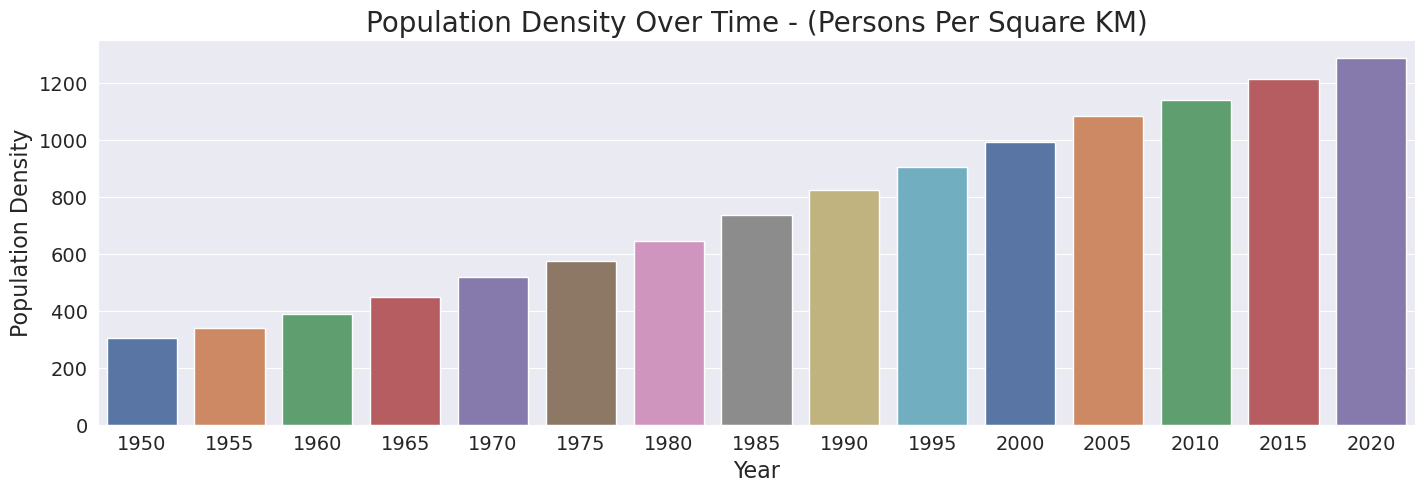

In [6]:
sns.barplot(x='Time', y='PopDensity', data=fnldf, palette='deep')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Population Density', fontsize=16)
plt.title('Population Density Over Time - (Persons Per Square KM)', fontsize=20)

plt.show();

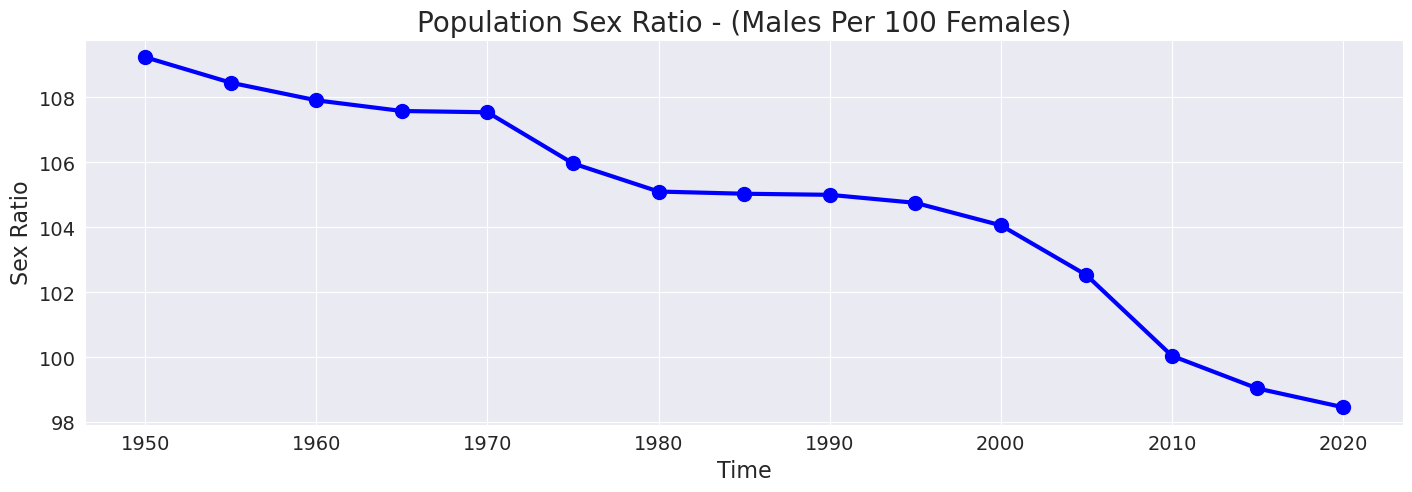

In [7]:
plt.plot(fnldf['Time'], fnldf['PopSexRatio'], 'o-b', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Sex Ratio', fontsize=16)
plt.title('Population Sex Ratio - (Males Per 100 Females)', fontsize=20)

plt.show();

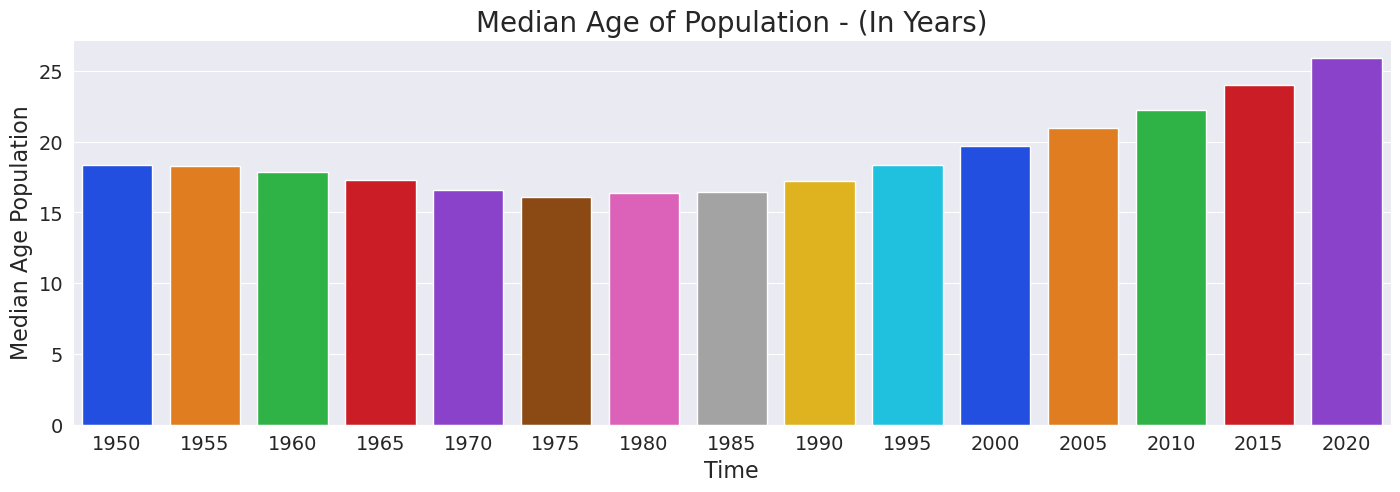

In [8]:
sns.barplot(x='Time', y='MedianAgePop', data=fnldf, palette='bright')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Median Age Population', fontsize=16)
plt.title('Median Age of Population - (In Years)', fontsize=20)

plt.show();

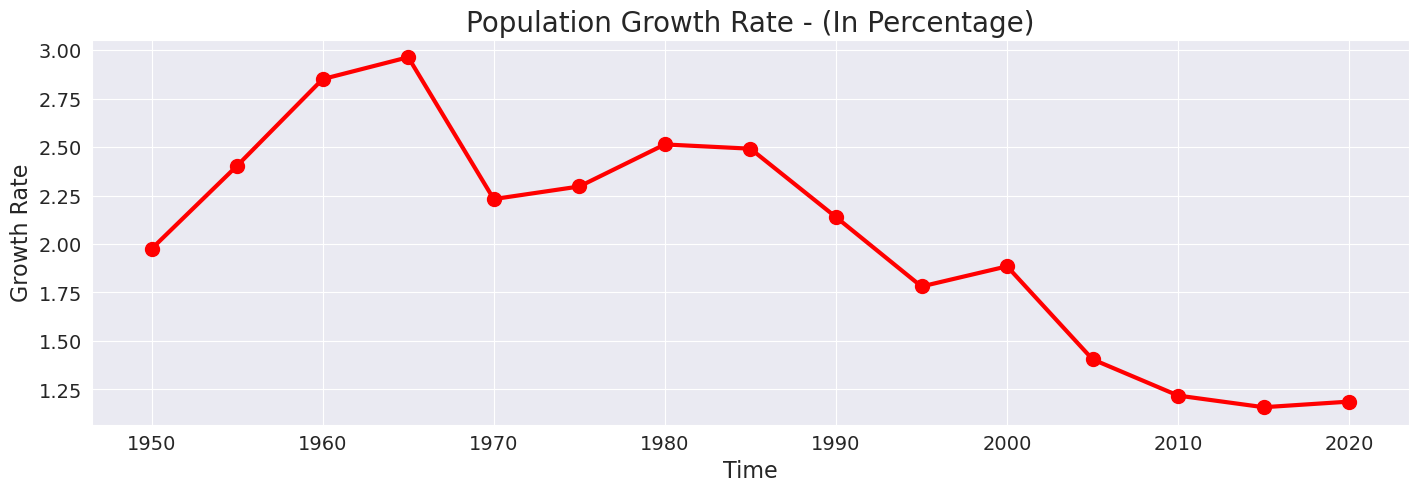

In [9]:
plt.plot(fnldf['Time'], fnldf['PopGrowthRate'], 'o-r', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Growth Rate', fontsize=16)
plt.title('Population Growth Rate - (In Percentage)', fontsize=20)

plt.show();

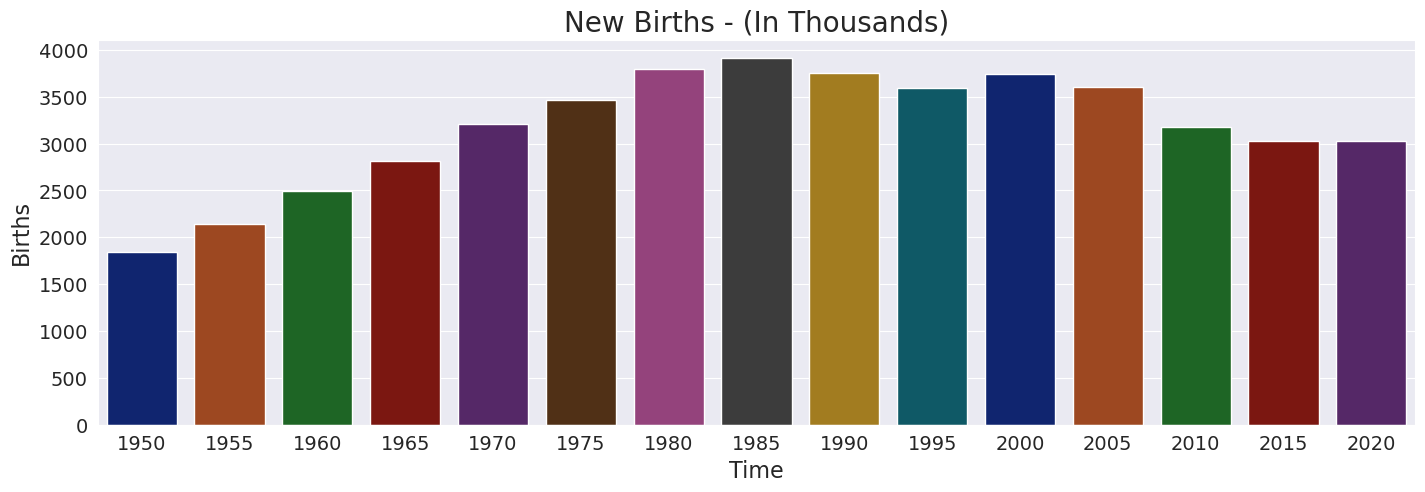

In [10]:
sns.barplot(x='Time', y='Births', data=fnldf, palette='dark')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Births', fontsize=16)
plt.title('New Births - (In Thousands)', fontsize=20)

plt.show();

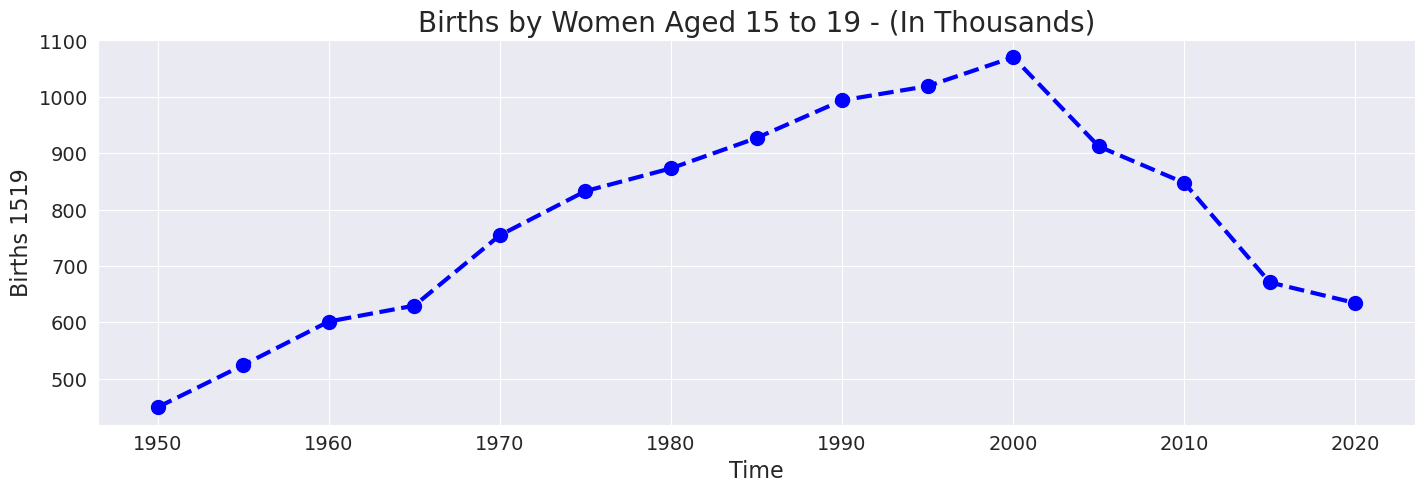

In [11]:
plt.plot(fnldf['Time'], fnldf['Births1519'], 'o--b', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Births 1519', fontsize=16)
plt.title('Births by Women Aged 15 to 19 - (In Thousands)', fontsize=20)

plt.show();

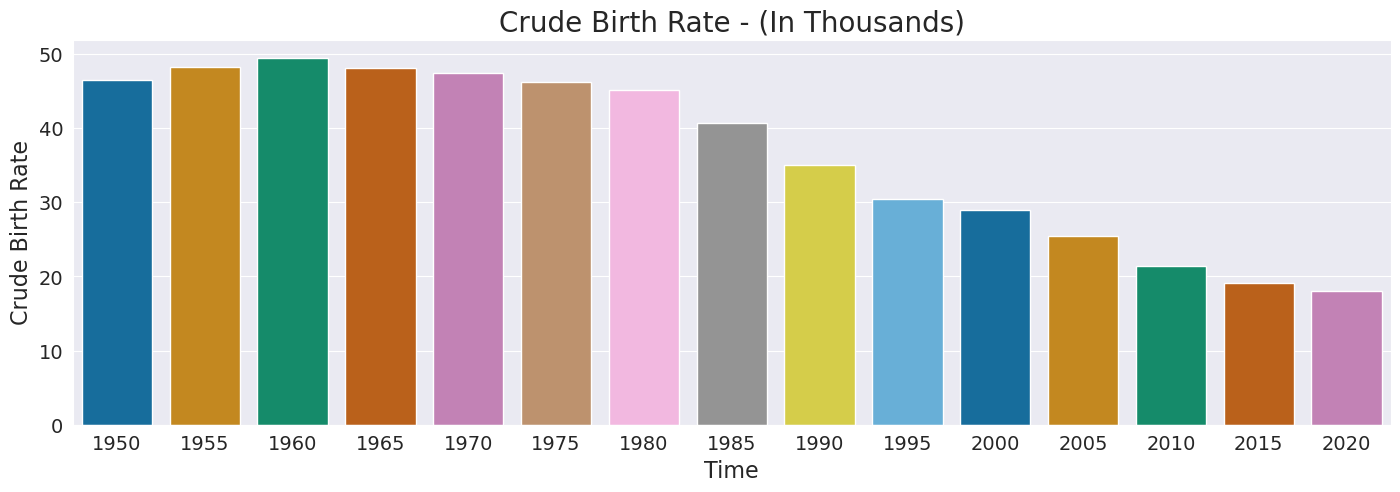

In [12]:
sns.barplot(x='Time', y='CrudeBirthRate', data=fnldf, palette='colorblind')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Crude Birth Rate', fontsize=16)
plt.title('Crude Birth Rate - (In Thousands)', fontsize=20)

plt.show();

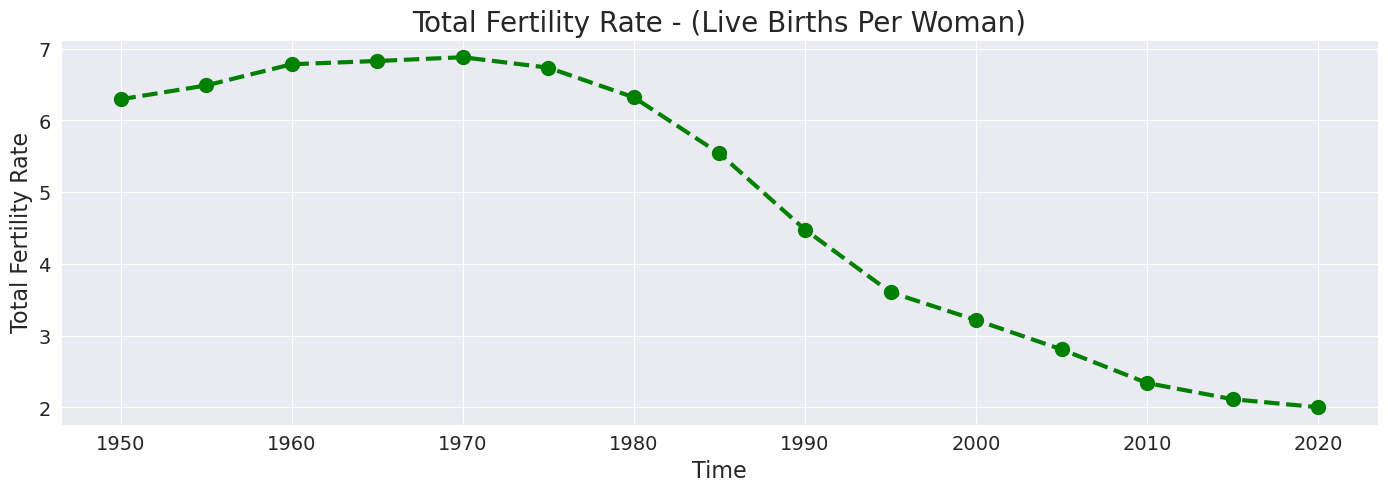

In [13]:
plt.plot(fnldf['Time'], fnldf['TotalFertilityRate'], 'o--g', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Total Fertility Rate', fontsize=16)
plt.title('Total Fertility Rate - (Live Births Per Woman)', fontsize=20)

plt.show();

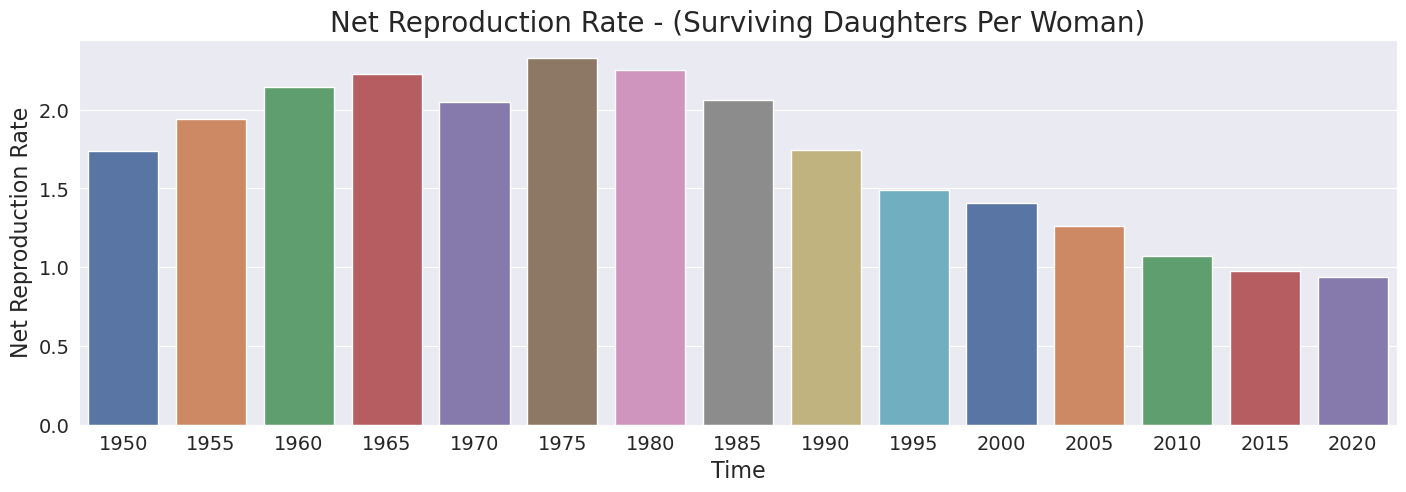

In [14]:
sns.barplot(x='Time', y='NetReproductionRate', data=fnldf, palette='deep')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Net Reproduction Rate', fontsize=16)
plt.title('Net Reproduction Rate - (Surviving Daughters Per Woman)', fontsize=20)

plt.show();

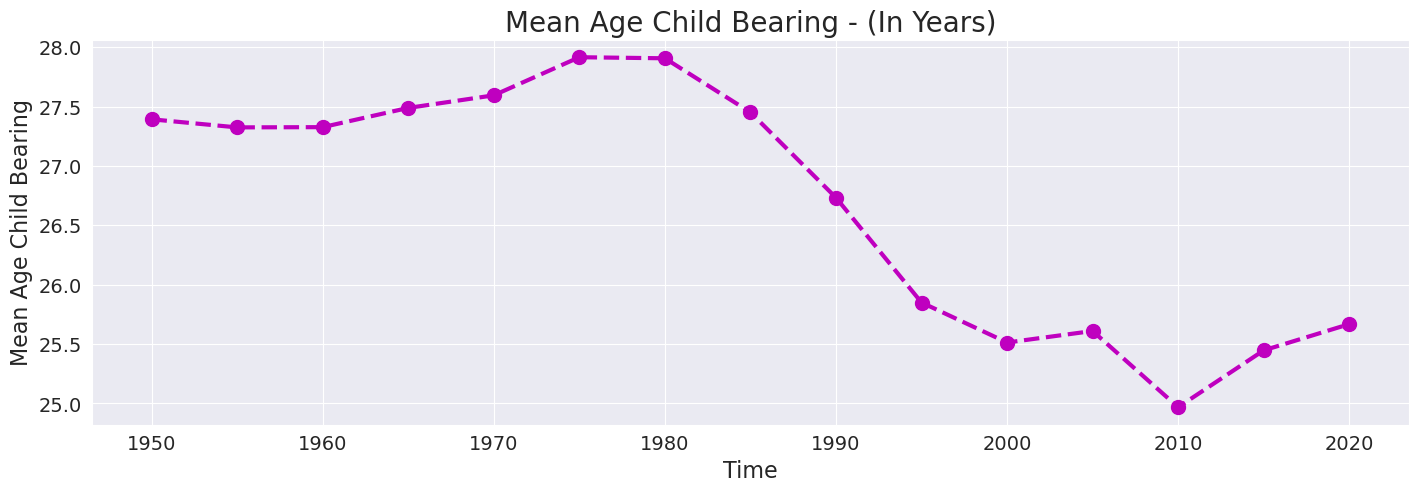

In [15]:
plt.plot(fnldf['Time'], fnldf['MeanAgeChildbearing'], 'o--m', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Mean Age Child Bearing', fontsize=16)
plt.title('Mean Age Child Bearing - (In Years)', fontsize=20)

plt.show();

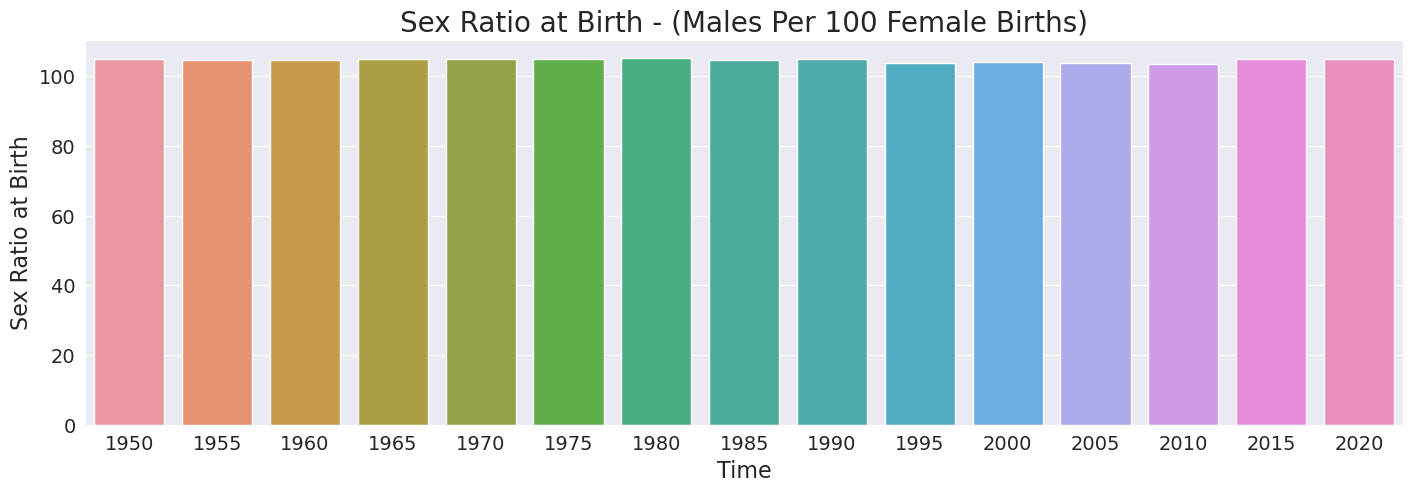

In [16]:
sns.barplot(x='Time', y='SexRatioatBirth', data=fnldf)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Sex Ratio at Birth', fontsize=16)
plt.title('Sex Ratio at Birth - (Males Per 100 Female Births)', fontsize=20)

plt.show();

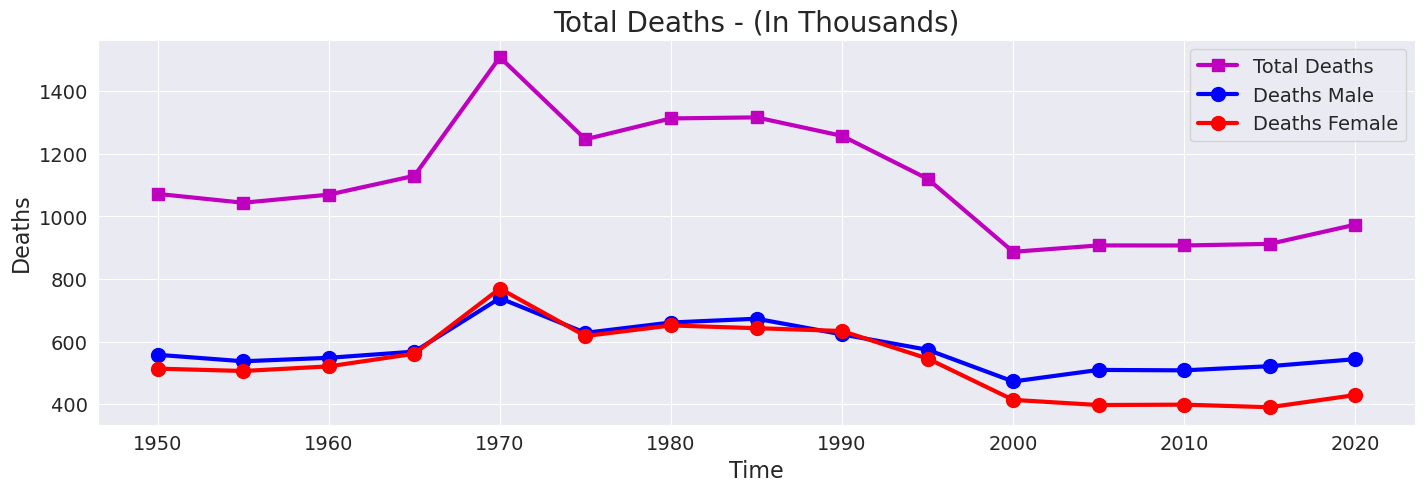

In [17]:
plt.plot(fnldf['Time'], fnldf['Deaths'], 's-m', lw=3, ms=8)
plt.plot(fnldf['Time'], fnldf['DeathsMale'], 'o-b', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['DeathsFemale'], 'o-r', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Deaths', fontsize=16)
plt.title('Total Deaths - (In Thousands)', fontsize=20)

plt.legend(['Total Deaths', 'Deaths Male', 'Deaths Female'])

plt.show();

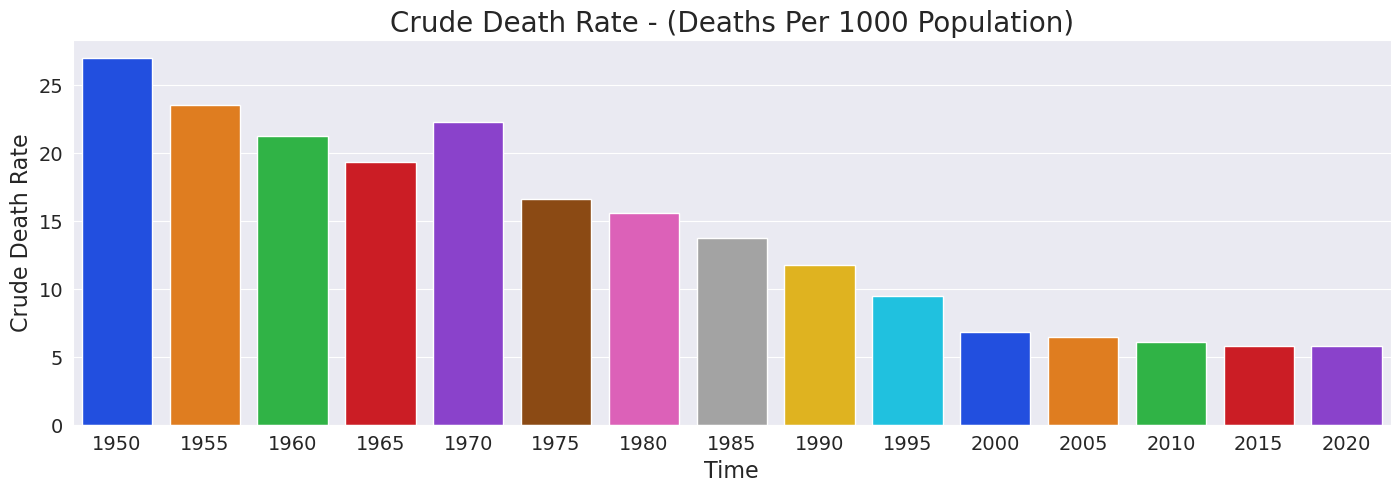

In [18]:
sns.barplot(x='Time', y='CrudeDeathRate', data=fnldf, palette='bright')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Crude Death Rate', fontsize=16)
plt.title('Crude Death Rate - (Deaths Per 1000 Population)', fontsize=20)

plt.show();

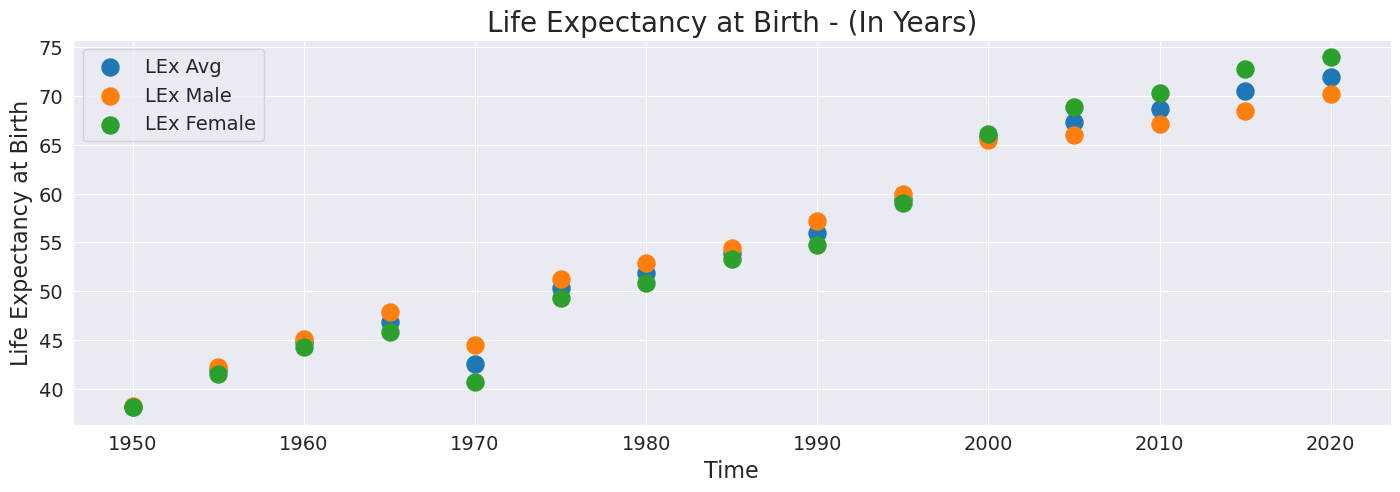

In [19]:
plt.scatter(fnldf['Time'], fnldf['LifeExpectancyatBirth'], s=150)
plt.scatter(fnldf['Time'], fnldf['LExMale'], s=150)
plt.scatter(fnldf['Time'], fnldf['LExFemale'], s=150)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Life Expectancy at Birth', fontsize=16)
plt.title('Life Expectancy at Birth - (In Years)', fontsize=20)

plt.legend(['LEx Avg', 'LEx Male', 'LEx Female'])

plt.show();

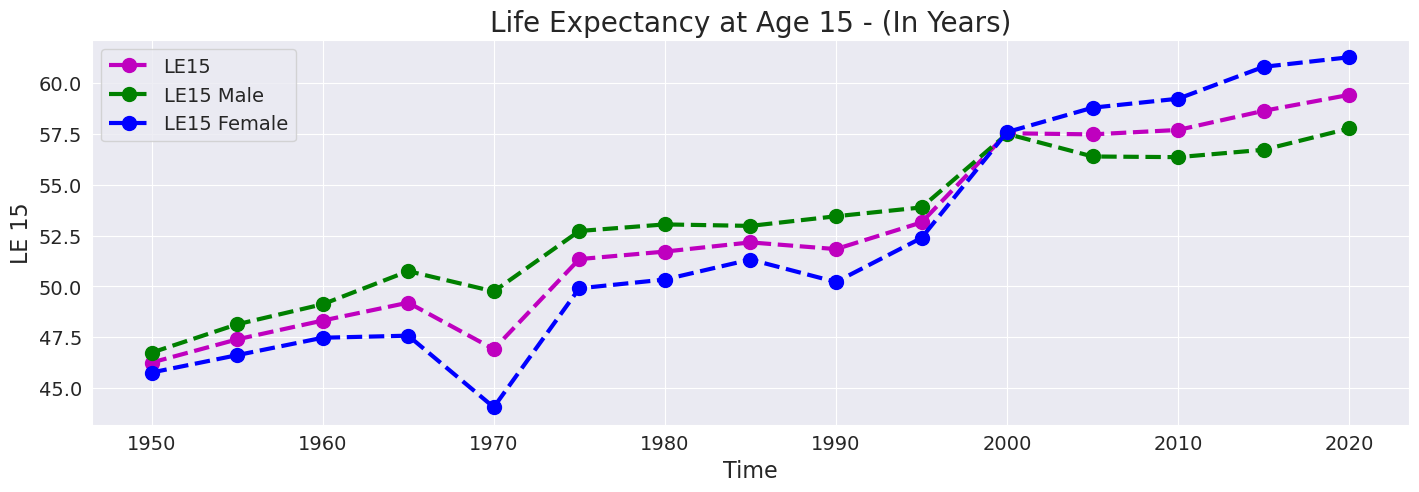

In [20]:
plt.plot(fnldf['Time'], fnldf['LE15'], 'o--m', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['LE15Male'], 'o--g', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['LE15Female'], 'o--b', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('LE 15', fontsize=16)
plt.title('Life Expectancy at Age 15 - (In Years)', fontsize=20)

plt.legend(['LE15', 'LE15 Male', 'LE15 Female'])

plt.show();

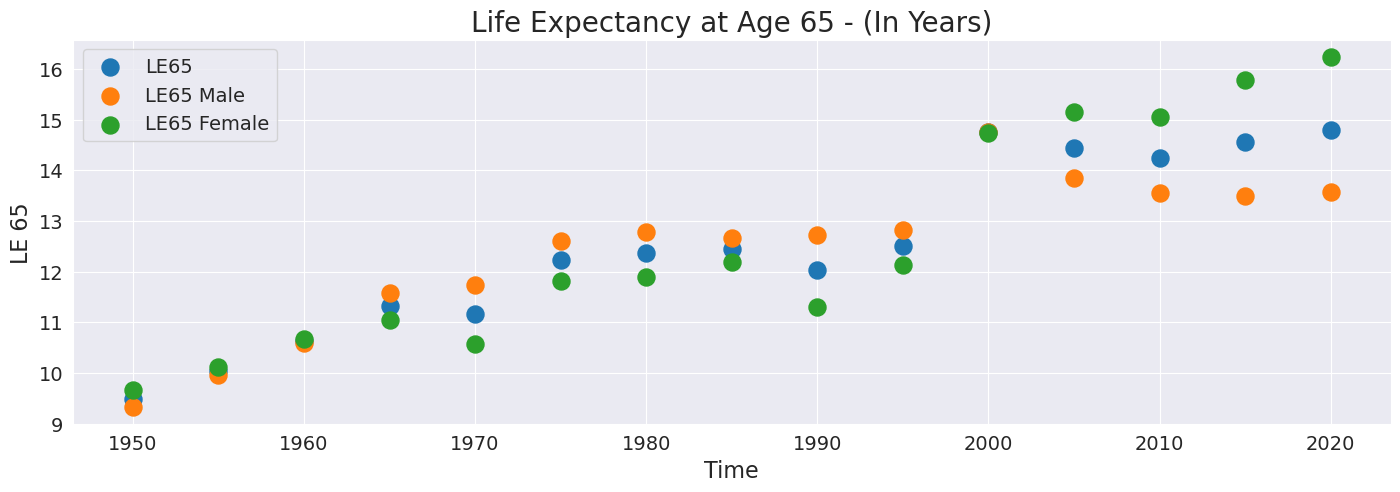

In [21]:
plt.scatter(fnldf['Time'], fnldf['LE65'], s=150)
plt.scatter(fnldf['Time'], fnldf['LE65Male'], s=150)
plt.scatter(fnldf['Time'], fnldf['LE65Female'], s=150)

plt.xlabel('Time', fontsize=16)
plt.ylabel('LE 65', fontsize=16)
plt.title('Life Expectancy at Age 65 - (In Years)', fontsize=20)

plt.legend(['LE65', 'LE65 Male', 'LE65 Female'])

plt.show();

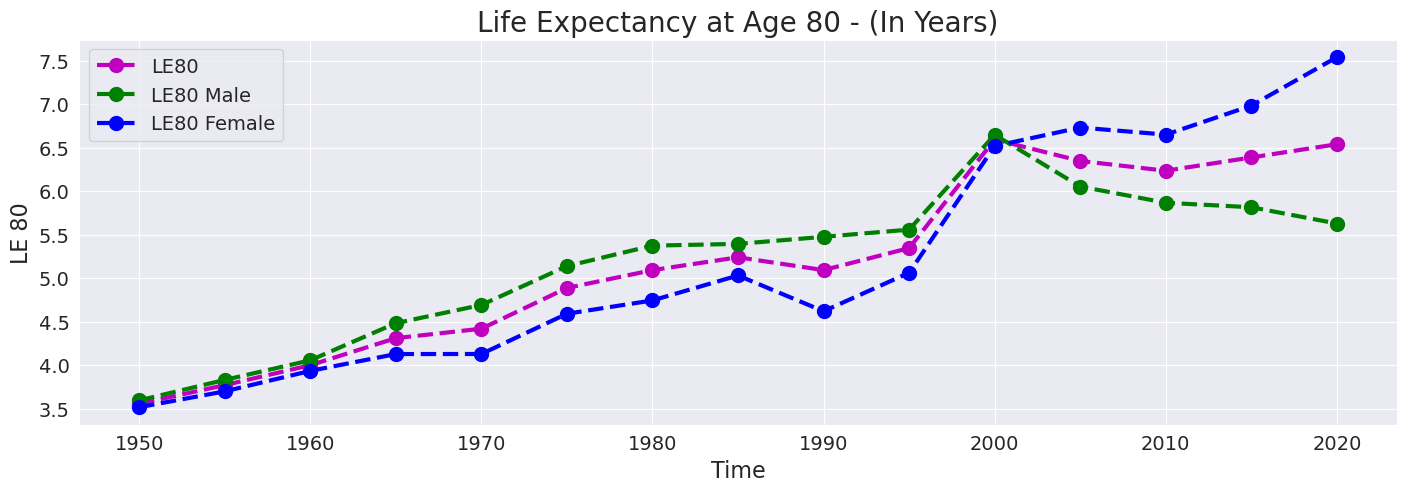

In [22]:
plt.plot(fnldf['Time'], fnldf['LE80'], 'o--m', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['LE80Male'], 'o--g', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['LE80Female'], 'o--b', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('LE 80', fontsize=16)
plt.title('Life Expectancy at Age 80 - (In Years)', fontsize=20)

plt.legend(['LE80', 'LE80 Male', 'LE80 Female'])

plt.show();

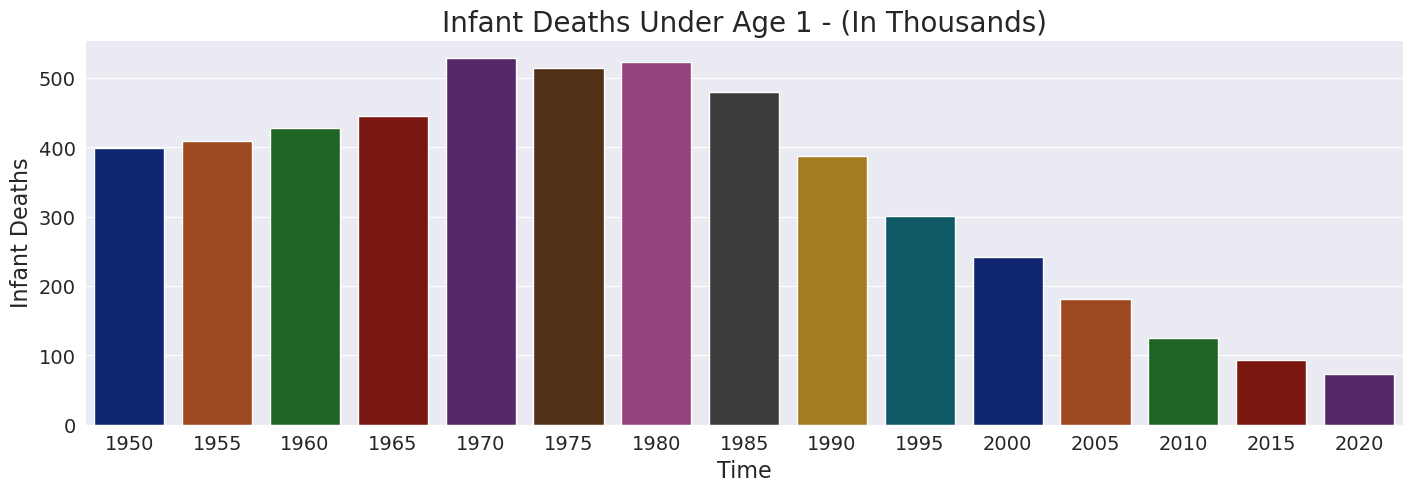

In [23]:
sns.barplot(x='Time', y='InfantDeaths', data=fnldf, palette='dark')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Infant Deaths', fontsize=16)
plt.title('Infant Deaths Under Age 1 - (In Thousands)', fontsize=20)

plt.show();

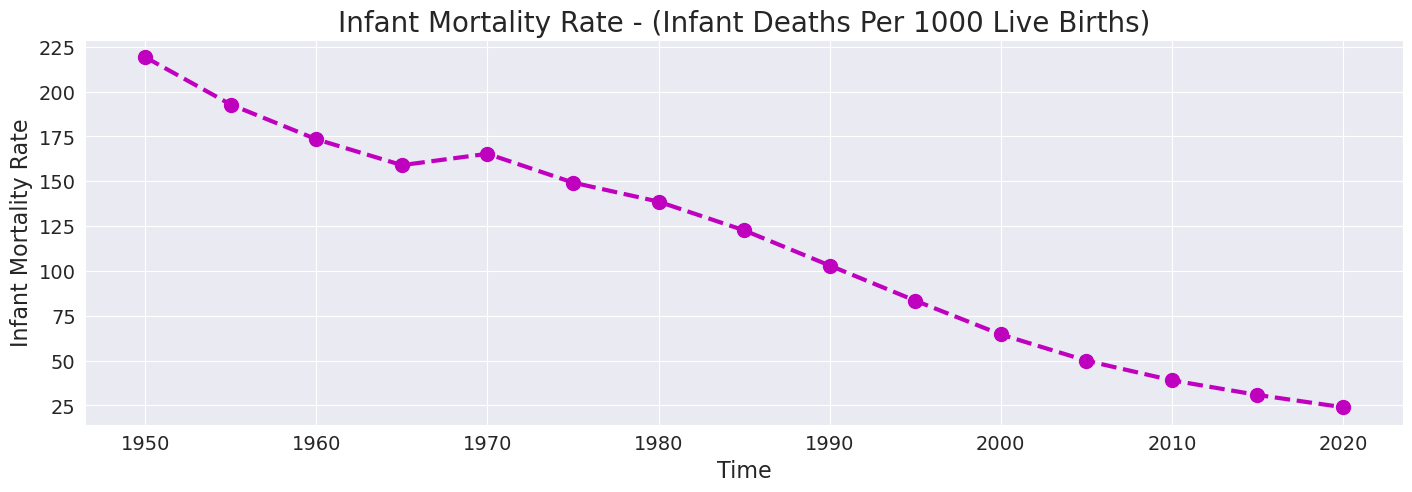

In [24]:
plt.plot(fnldf['Time'], fnldf['Infant Mortality Rate'], 'o--m', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Infant Mortality Rate', fontsize=16)
plt.title('Infant Mortality Rate - (Infant Deaths Per 1000 Live Births)', fontsize=20)

plt.show();

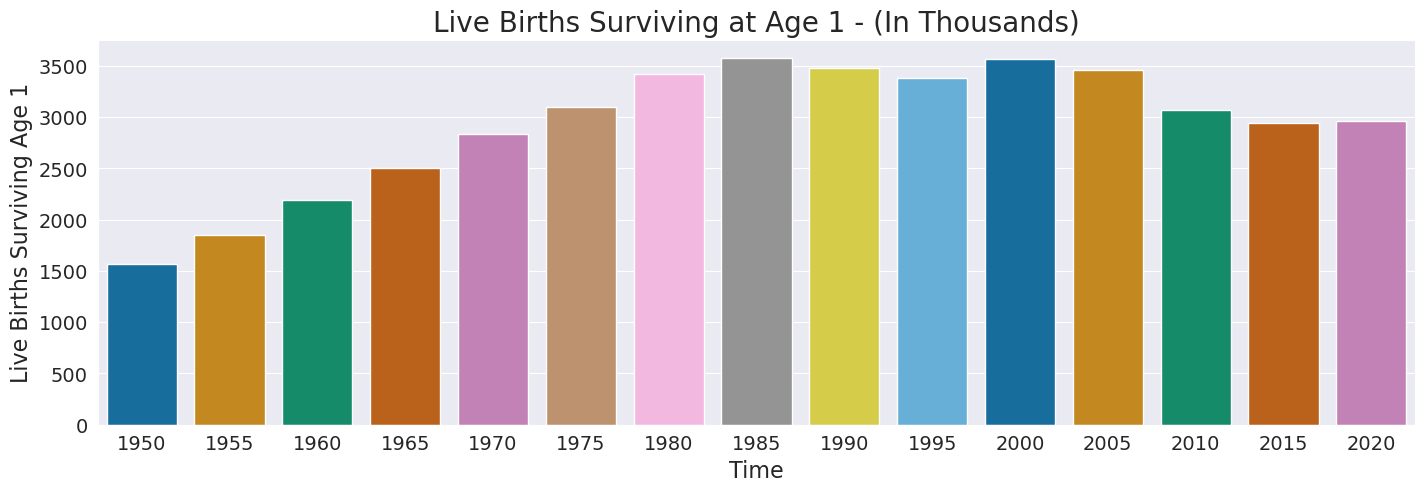

In [25]:
sns.barplot(x='Time', y='LiveBirthsSurvivingAge1', data=fnldf, palette='colorblind')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Live Births Surviving Age 1', fontsize=16)
plt.title('Live Births Surviving at Age 1 - (In Thousands)', fontsize=20)

plt.show();

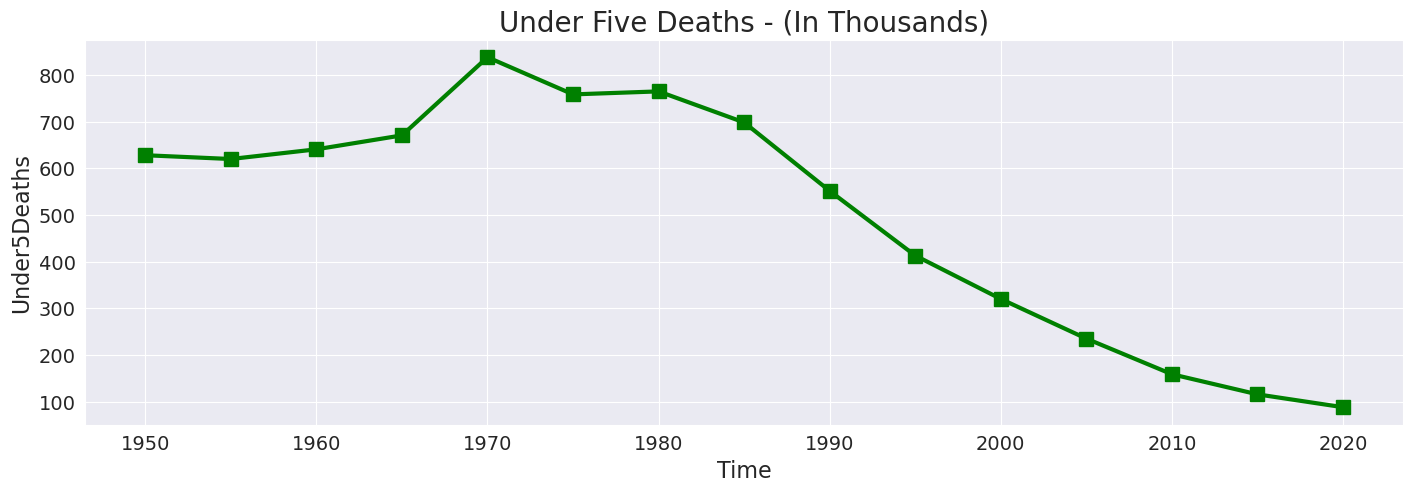

In [26]:
plt.plot(fnldf['Time'], fnldf['Under5Deaths'], 's-g', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('Under5Deaths', fontsize=16)
plt.title('Under Five Deaths - (In Thousands)', fontsize=20)

plt.show();

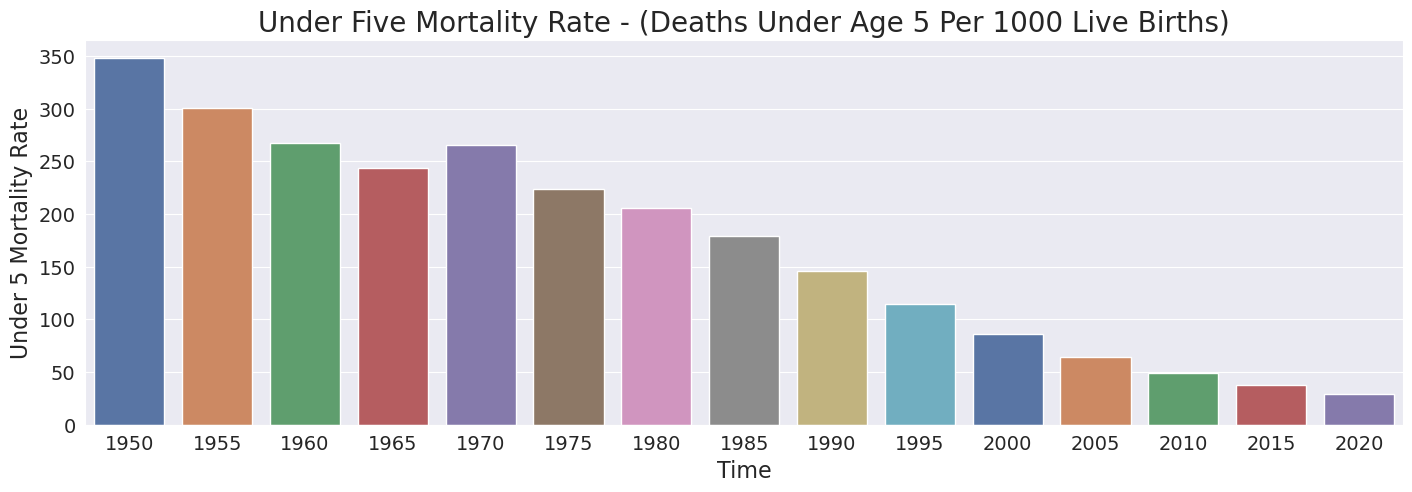

In [27]:
sns.barplot(x='Time', y='Under5MortalityRate', data=fnldf, palette='deep')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Under 5 Mortality Rate', fontsize=16)
plt.title('Under Five Mortality Rate - (Deaths Under Age 5 Per 1000 Live Births)', fontsize=20)

plt.show();

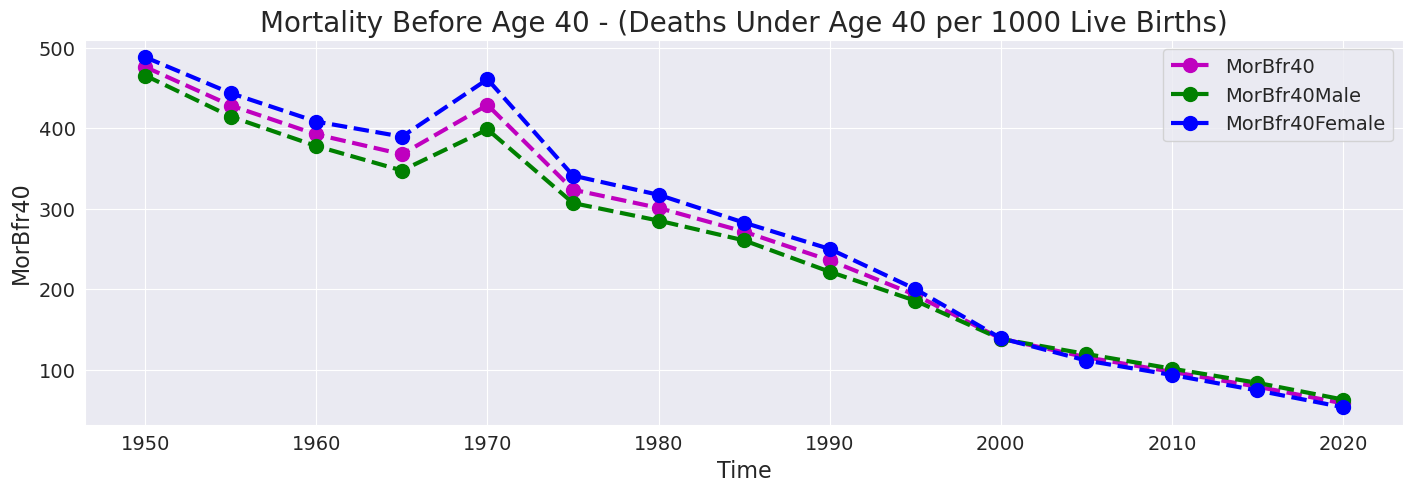

In [28]:
plt.plot(fnldf['Time'], fnldf['MorBfr40'], 'o--m', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['MorBfr40Male'], 'o--g', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['MorBfr40Female'], 'o--b', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('MorBfr40', fontsize=16)
plt.title('Mortality Before Age 40 - (Deaths Under Age 40 per 1000 Live Births)', fontsize=20)

plt.legend(['MorBfr40', 'MorBfr40Male', 'MorBfr40Female'])

plt.show();

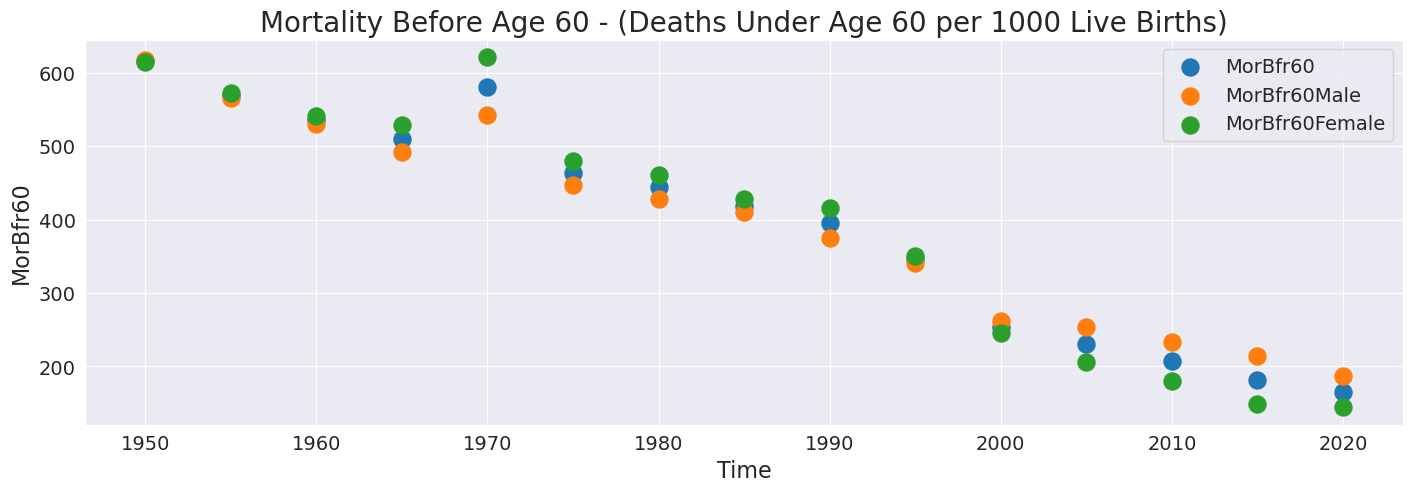

In [29]:
plt.scatter(fnldf['Time'], fnldf['MorBfr60'], s=150)
plt.scatter(fnldf['Time'], fnldf['MorBfr60Male'], s=150)
plt.scatter(fnldf['Time'], fnldf['MorBfr60Female'], s=150)

plt.xlabel('Time', fontsize=16)
plt.ylabel('MorBfr60', fontsize=16)
plt.title('Mortality Before Age 60 - (Deaths Under Age 60 per 1000 Live Births)', fontsize=20)

plt.legend(['MorBfr60', 'MorBfr60Male', 'MorBfr60Female'])

plt.show();

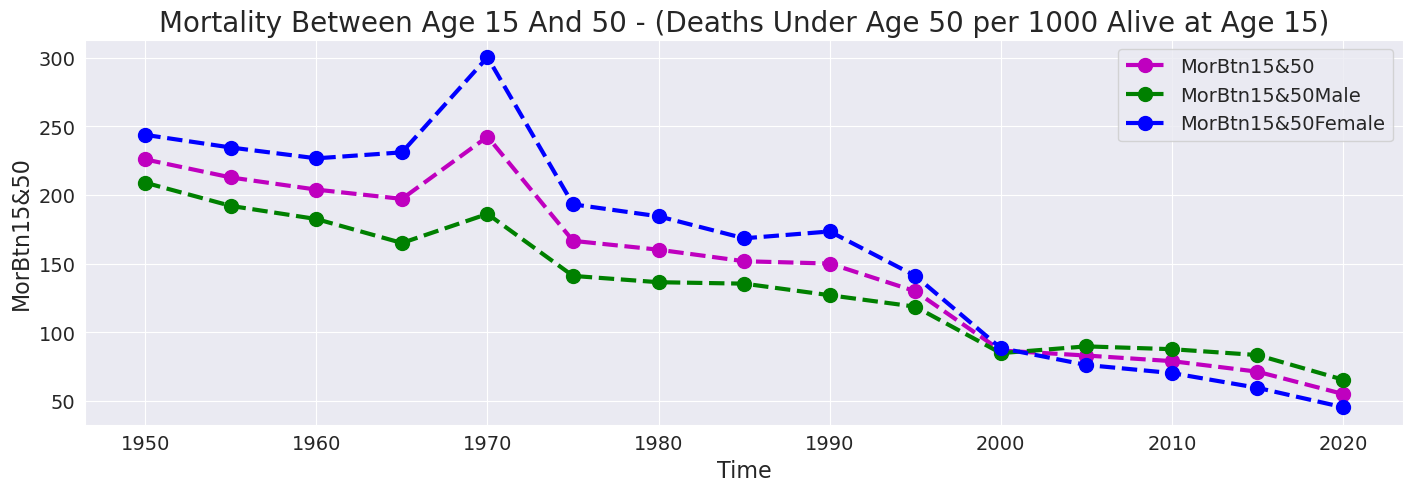

In [30]:
plt.plot(fnldf['Time'], fnldf['MorBtn15&50'], 'o--m', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['MorBtn15&50Male'], 'o--g', lw=3, ms=10)
plt.plot(fnldf['Time'], fnldf['MorBtn15&50Female'], 'o--b', lw=3, ms=10)

plt.xlabel('Time', fontsize=16)
plt.ylabel('MorBtn15&50', fontsize=16)
plt.title('Mortality Between Age 15 And 50 - (Deaths Under Age 50 per 1000 Alive at Age 15)', fontsize=20)

plt.legend(['MorBtn15&50', 'MorBtn15&50Male', 'MorBtn15&50Female'])

plt.show();

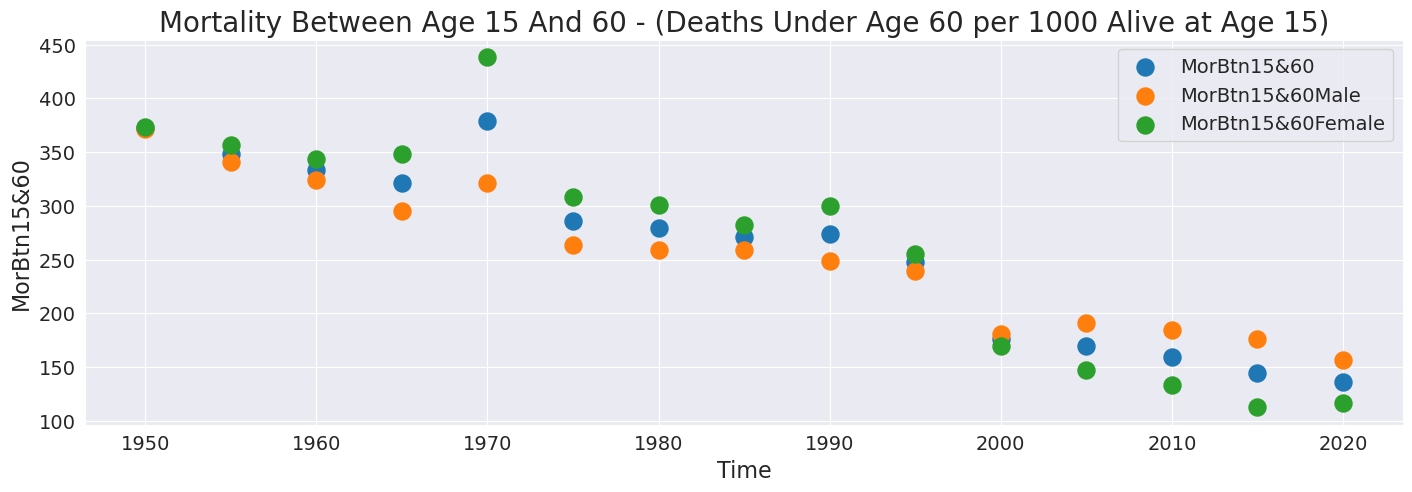

In [31]:
plt.scatter(fnldf['Time'], fnldf['MorBtn15&60'], s=150)
plt.scatter(fnldf['Time'], fnldf['MorBtn15&60Male'], s=150)
plt.scatter(fnldf['Time'], fnldf['MorBtn15&60Female'], s=150)

plt.xlabel('Time', fontsize=16)
plt.ylabel('MorBtn15&60', fontsize=16)
plt.title('Mortality Between Age 15 And 60 - (Deaths Under Age 60 per 1000 Alive at Age 15)', fontsize=20)

plt.legend(['MorBtn15&60', 'MorBtn15&60Male', 'MorBtn15&60Female'])

plt.show();

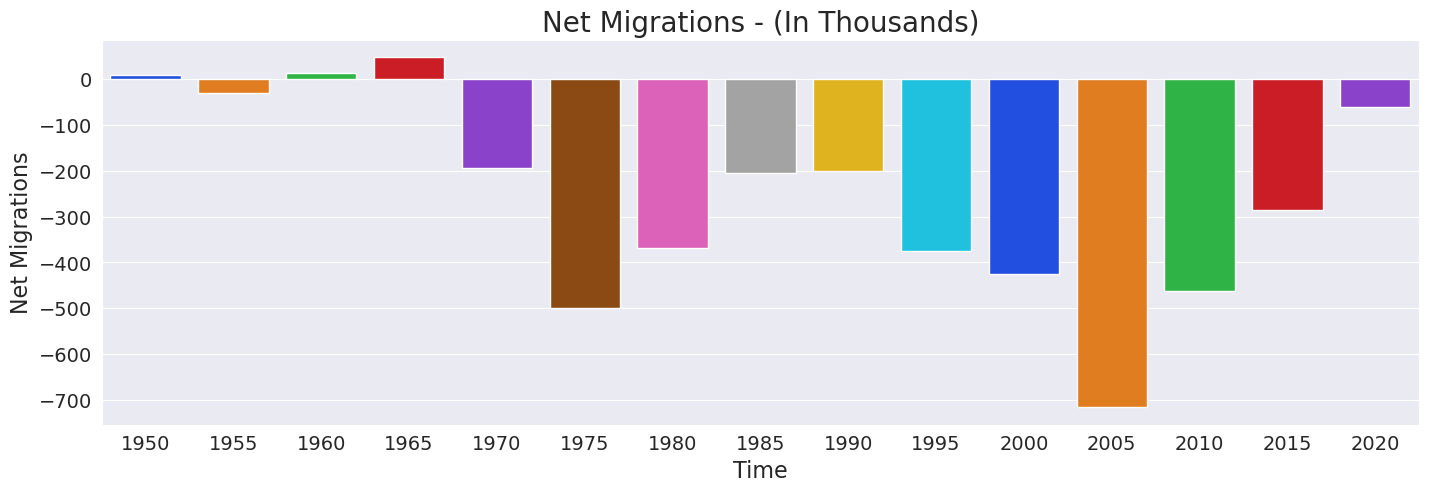

In [32]:
sns.barplot(x='Time', y='NetMigrations', data=fnldf, palette='bright')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Net Migrations', fontsize=16)
plt.title('Net Migrations - (In Thousands)', fontsize=20)

plt.show();

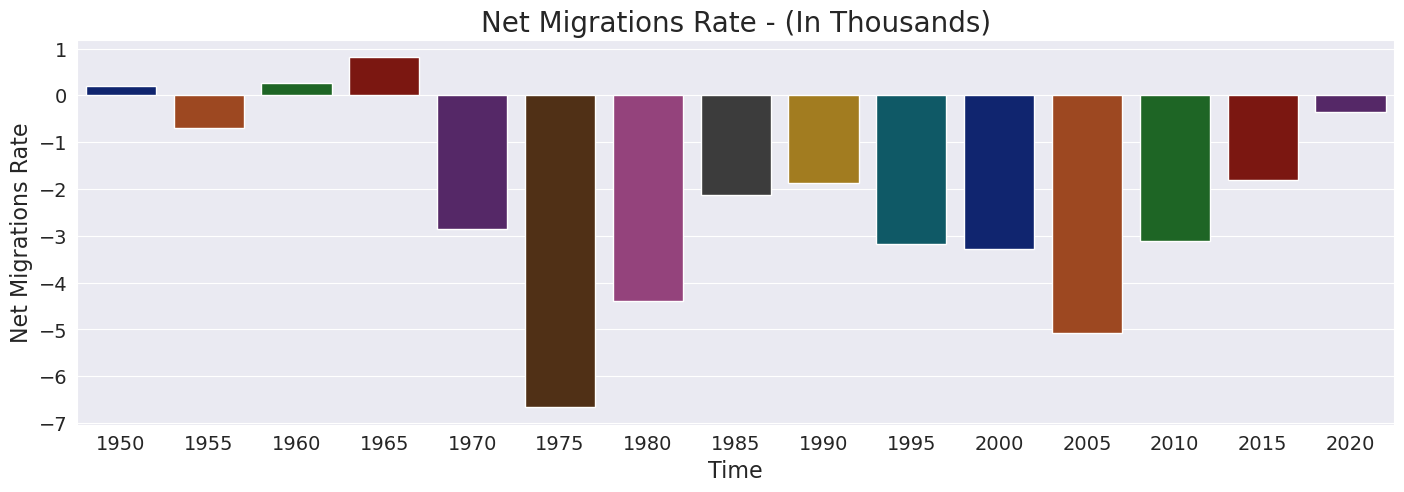

In [33]:
sns.barplot(x='Time', y='NetMigrationsRate', data=fnldf, palette='dark')

plt.xlabel('Time', fontsize=16)
plt.ylabel('Net Migrations Rate', fontsize=16)
plt.title('Net Migrations Rate - (In Thousands)', fontsize=20)

plt.show();

# Concluding Remarks

Having said that, Bangladesh's population has grown rapidly over the past several decades, with a significant decline in fertility rates and improvements in life expectancy and infant mortality rates. However, the country still faces significant challenges related to its large population, including high levels of poverty and limited access to education and healthcare and so on.